In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
matplotlib.style.use('ggplot')
#ols models
import statsmodels.formula.api as sm
from patsy import dmatrices
import re
import scipy as sp
from tools import print_columns

In [2]:
#read data
df_full = pd.read_csv("../../Data/MA_InstallersCostsReport 10-08-15.csv", low_memory=False)

In [3]:
df_full.columns = df_full.columns.str.replace(' ','_')
#df_full = df_full[(df_full.T != 0).all()]

In [ ]:
print_columns(df_full)

In [5]:
#get year from date
df_full.ix[:,3] =  pd.to_datetime(df_full.ix[:,3], infer_datetime_format=True)
df_full['Date_in_Service_(Available_for_Projects_April_2010_and_Later)_Year'] = df_full.ix[:,3].dt.year

In [6]:
#keep cleaning
df_full['Total_Installation_Costs'] = df_full['Total_Installation_Costs'].str.replace(r'[$,]', '').astype('float')


In [7]:
df_full['Installation_Cost_per_Watt'] = df_full['Installation_Cost_per_Watt'].str.replace(r'[$,]', '').astype('float')

In [8]:
#keep cleaning
df = df_full[(df_full['Date_in_Service_(Available_for_Projects_April_2010_and_Later)_Year'] > 2014) &\
             (df_full['Total_Installation_Costs'] > 0.0) &\
            (df_full['Project_Sector'] == 'Residential')]

df['Primary_Installer_(a.k.a_Applicant_in_PowerClerk)_clear'] = df['Primary_Installer_(a.k.a_Applicant_in_PowerClerk)']

/Users/wilfeli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
df_short = df[['Total_Installation_Costs', 'System_Size_(kW)', \
               'Installation_Cost_per_Watt', 'Primary_Installer_(a.k.a_Applicant_in_PowerClerk)_clear']]
df_short['Count'] = 1

/Users/wilfeli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
df_short['System_Size_AC'] = df_short['Total_Installation_Costs']/df_short['Installation_Cost_per_Watt']/1000

In [21]:
df_short['key1'] = df_short.groupby('Primary_Installer_(a.k.a_Applicant_in_PowerClerk)_clear')['Count'].transform('sum')

In [22]:
df_short = df_short.sort_values(['key1'], ascending=[False])

In [23]:
grouped = df_short.groupby('Primary_Installer_(a.k.a_Applicant_in_PowerClerk)_clear', sort=False)

In [26]:
df_agg = grouped.agg({'Total_Installation_Costs' : np.median,\
             'System_Size_AC' : np.median, \
            'Count' : np.sum, \
            'Installation_Cost_per_Watt' : np.median})

In [28]:
df_agg.shape

(82, 4)

/Users/wilfeli/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


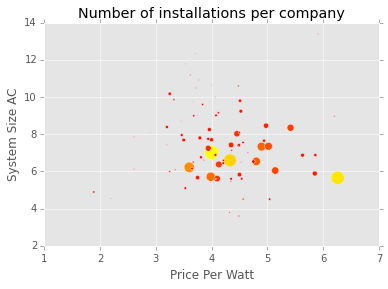

In [34]:
N = df_agg.shape[0]
x = df_agg['Installation_Cost_per_Watt']
y = df_agg['System_Size_AC']
norm = matplotlib.colors.Normalize(vmin=df_agg['Count'][-1], vmax=df_agg['Count'][0])
cmap_custom = cm.get_cmap('autumn')
area = norm(df_agg['Count'])
color = []

for area_x in area:
    color.append(cmap_custom(area_x))
plt.xlabel('Price Per Watt')
plt.ylabel('System Size AC')
plt.title('Number of installations per company')
plt.scatter(x, y, s=df_agg['Count'],  c = color )
plt.savefig('Installers_size_mt.png', dpi=300)
plt.show()

In [35]:
df_agg

,Count,Installation_Cost_per_Watt,System_Size_AC,Total_Installation_Costs
Primary_Installer_(a.k.a_Applicant_in_PowerClerk)_clear,,,,
Astrum Solar,197,4.000,7.013990,27887.500
Next Step Living,178,6.260,5.652311,35264.550
Real Goods Solar,163,4.330,6.599324,28000.000
"SolarFlair Energy, Inc.",109,3.600,6.219316,22840.000
NorthEast Solar Design Associates,84,3.985,5.712318,24049.000
SunBug,78,4.895,7.333357,32738.000
Pioneer Valley PhotoVoltaics Cooperative,72,4.800,6.539956,31632.250
Endless Mountains Solar Services,62,5.020,7.351798,36978.500
E 2 Solar PV,54,5.140,6.046217,29100.000
